1. Download the Python CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html. This data set contains all the CIFAR-10 images stored as a series of pickle files. 
2. Use the code provided in the link to read the pickle file and extract the data and label. The data contains the images and the labels in the range 0-9. The link explains the relationship between label and the objects in the image.
3. Append all the data and label together.
4. Visualize the distribution of labels by plotting a histogram. Explain what you observe?
5. Write a generator function getbatch() that will return a batch of x and y as a tuple. The function must have the signature getbatch(alldata, alllabels, batch_size = 16). It must yield a tuple with a numpy array of x (the images) and a numpy array of y (the label). The size of each element in x must be [batchsize, noofchannels, width, height]

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import operator
import functools
import random

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
noofepochs = 128
batch_size = 16
number_images_batch = 10000
image_shape = (32, 32, 3,)
image_size = functools.reduce(operator.mul, image_shape)
print(image_size)

3072


In [4]:
alldata = np.zeros((5*number_images_batch, image_size), dtype=np.int)
alllabels = []
begin = 0
end = number_images_batch
for filename in glob.glob(os.path.join("cifar-10-batches-py", "data_batch*")):
    print(filename)
    d1 = unpickle(filename)
    labels = d1[b'labels']
    data = d1[b'data']
    print(data.shape)
    alldata[begin:end,:] = data
    alllabels.extend(labels)
    begin = end
    end = end+number_images_batch
alldata = alldata.reshape([-1, 3, 32, 32]).astype(np.uint8)
print(alldata.shape)
print(len(alllabels))

cifar-10-batches-py/data_batch_1
(10000, 3072)
cifar-10-batches-py/data_batch_2
(10000, 3072)
cifar-10-batches-py/data_batch_5
(10000, 3072)
cifar-10-batches-py/data_batch_4
(10000, 3072)
cifar-10-batches-py/data_batch_3
(10000, 3072)
(50000, 3, 32, 32)
50000


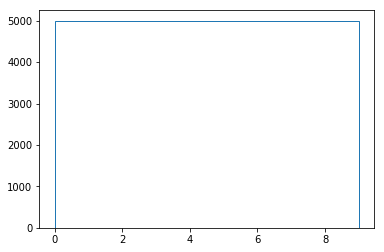

(array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]), array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))


In [7]:
plt.hist(alllabels, histtype='step')
plt.show()

# Print the histogram numbers
histval = np.histogram(alllabels, bins=10)
print(histval)

(32, 32, 3)


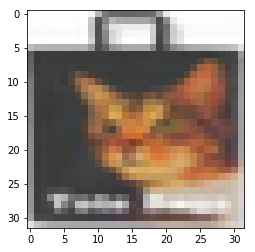

In [11]:
oneimage = alldata[3000].transpose(1, 2, 0)
print(oneimage.shape)
plt.imshow(oneimage)

(16, 3, 32, 32) (16,)
[9 8 9 0 3 6 3 7 6 9 6 4 8 6 2 8]
(16, 3, 32, 32) (16,)
[8 3 7 4 5 0 4 3 1 6 8 3 8 5 7 3]
(16, 3, 32, 32) (16,)
[3 4 3 7 2 2 6 8 2 5 8 3 4 7 2 1]
(16, 3, 32, 32) (16,)
[2 6 9 5 1 7 5 3 7 4 4 4 7 7 1 2]
(16, 3, 32, 32) (16,)
[2 0 5 2 7 6 6 3 6 4 1 3 3 2 6 2]
(16, 3, 32, 32) (16,)
[7 9 2 1 1 9 1 6 3 8 1 8 9 0 0 0]


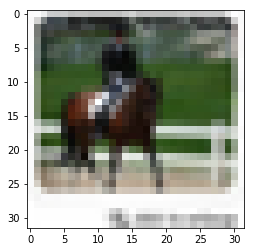

In [13]:
def getbatch(alldata, alllabels, batch_size = 16):
    nlabels = len(alllabels)
    number_of_batches = 100//batch_size # TODO: Change 100 to nlabels
    for batch_number in range(number_of_batches):
        rand_index = [random.randrange(0, nlabels) for i in range(batch_size)]
        batch_x = alldata[rand_index]
        batch_y = np.array([alllabels[idx] for idx in rand_index])
        yield (batch_x, batch_y)
    
for x, y in getbatch(alldata, alllabels, batch_size = batch_size):
    print(x.shape, y.shape)
    print(y)
    plt.imshow(x[0].transpose(1, 2, 0))
    
plt.show()